# Z-Dependent Delayed-Extra Sources in NuPyCEE

Created by Benoit Côté

Please see the "Delayed_extra_source" iPython Notebook for an introduction

In [1]:
# Import Python packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Import GCE codes
from NuPyCEE import sygma
from NuPyCEE import omega

## Defining Z-dependent DTD for a single enrichment source

The following is an example with 3 metallicites. The GCE code reads these metallicities directly from the yields table, they are not defined as input parameter. Using the z_dependent_DTD.txt yields table, the metallicities are 0.02, 0.01, and 0.001.

In [2]:
# DTD for Z = 0.02
# ================
t_0_02 = [0.0, 1.0e8, 1.0e9]
R_0_02 = [1.0, 3.0, 2.0]
dtd_0_02 = []
for i in range(0,len(t_0_02)):
    dtd_0_02.append([t_0_02[i], R_0_02[i]])
    
# DTD for Z = 0.01
# ================
t_0_01 = [0.0, 1.0e8, 1.0e9, 1.5e9]
R_0_01 = [3.0, 1.0, 0.5, 0.01]
dtd_0_01 = []
for i in range(0,len(t_0_01)):
    dtd_0_01.append([t_0_01[i], R_0_01[i]])
    
# DTD for Z = 0.001
# =================
t_0_001 = [0.0, 3.0e7, 6.0e7, 9.0e7, 3.0e8]
R_0_001 = [1.0, 1.0, 1.0, 1.0, 1.0]
dtd_0_001 = []
for i in range(0,len(t_0_001)):
    dtd_0_001.append([t_0_001[i], R_0_001[i]])
    
# Keep track of the highest time
t_max = max([t_0_02[-1], t_0_01[-1], t_0_001[-1]])

In [3]:
# Generate the NuPyCEE input parameters
# =====================================

# Add the DTD array in the delayed_extra_dtd array.
delayed_extra_dtd = [[dtd_0_02, dtd_0_01, dtd_0_001]]
# delayed_extra_dtd[ source index ][ Z index ]

# Define the total number of event per unit of Msun formed.  This will normalize the DTD.
delayed_extra_dtd_norm = [[1.0e-1, 1.0e-2, 1.0e-3]]
# delayed_extra_dtd_norm[ source index ][ Z index ]

# Define the yields path for the extra source
delayed_extra_yields = ['yield_tables/z_dependent_DTD.txt']
# delayed_extra_yields[ source index ] --> Z-dependence is in the yields table

# Define the total mass ejected by an extra source
# Here we are going to assume that there is no multiplication factor applied to the yields
delayed_extra_yields_norm = [[1.0, 1.0, 1.0]]
# delayed_extra_yields_norm[ source index ][ Z index ]

# NOTE: You can define if you want to interpolate DTDs and yields in the log-log space 
# log(quantity) = A*log(Z) + B
# It is worth to try both options when you do GCE to see the impact !!
delayed_extra_log = False
delayed_extra_yields_log_int = False

# Define the arguments to be thrown in the NuPyCEE codes
kwargs = {"delayed_extra_dtd":delayed_extra_dtd, "delayed_extra_dtd_norm":delayed_extra_dtd_norm,\
          "delayed_extra_yields":delayed_extra_yields, "delayed_extra_yields_norm":delayed_extra_yields_norm,\
          "delayed_extra_log":delayed_extra_log, "delayed_extra_yields_log_int":delayed_extra_yields_log_int}

## Quantitative test with SYGMA

In [4]:
# Set all simple stellar population to a total mass of 1 Msun 
mgal = 1.0

# Run SYGMA, one SSP with a total mass of 1 Msun at Z = 0.02
s_0_02 = sygma.sygma(iniZ=0.02, mgal=mgal, special_timesteps=120, tend=1.1*t_0_02[-1], **kwargs)

# Run SYGMA, one SSP with a total mass of 1 Msun at Z = 0.01
s_0_01 = sygma.sygma(iniZ=0.01, mgal=mgal, special_timesteps=120, tend=1.1*t_0_01[-1], **kwargs)

# Run SYGMA, one SSP with a total mass of 1 Msun at Z = 0.001
s_0_001 = sygma.sygma(iniZ=0.001, mgal=mgal, special_timesteps=120, tend=1.1*t_0_001[-1], **kwargs)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.11s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.11s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.1s


In [5]:
# Function to test SYGMA for the ejected mass and number of event for a given metallicity
def test_sygma_quantity(i_Z, s, i_source=0):

    # Predicted number of events
    N_pred = delayed_extra_dtd_norm[i_source][i_Z] * mgal

    # Predicted mass ejected by events
    yields_from_table = sum(s.ytables_delayed_extra[i_source].get(Z=s.iniZ,quantity="Yields"))
    M_ej_pred = N_pred * yields_from_table * delayed_extra_yields_norm[i_source][i_Z]

    # Calculated number of events, from SYGMA
    N_sim = np.sum(s.delayed_extra_numbers[i_source])

    # Calculated mass ejected by events, from SYGMA
    M_ej_sim = np.sum(s.ymgal_delayed_extra[i_source][-1])

    # Print the test
    print ('The following numbers should be 1.0')
    print ('   Number of events (predicted/calculated):', N_pred / N_sim)
    print ('   Mass ejected by events (predicted/calculated):', M_ej_pred / M_ej_sim)

In [6]:
# Print the test results for Z = 0.02
print("SYGMA (Z = 0.02)")
print("================")
test_sygma_quantity(0, s_0_02)
print()

# Print the test results for Z = 0.01
print("SYGMA (Z = 0.01)")
print("================")
test_sygma_quantity(1, s_0_01)
print()

# Print the test results for Z = 0.001
print("SYGMA (Z = 0.001)")
print("================")
test_sygma_quantity(2, s_0_001)
print()

SYGMA (Z = 0.02)
The following numbers should be 1.0
   Number of events (predicted/calculated): 1.0
   Mass ejected by events (predicted/calculated): 1.0000000000000004

SYGMA (Z = 0.01)
The following numbers should be 1.0
   Number of events (predicted/calculated): 1.0
   Mass ejected by events (predicted/calculated): 0.999999999999994

SYGMA (Z = 0.001)
The following numbers should be 1.0
   Number of events (predicted/calculated): 1.0
   Mass ejected by events (predicted/calculated): 1.0



## Qualitative test with SYGMA

<IPython.core.display.Javascript object>


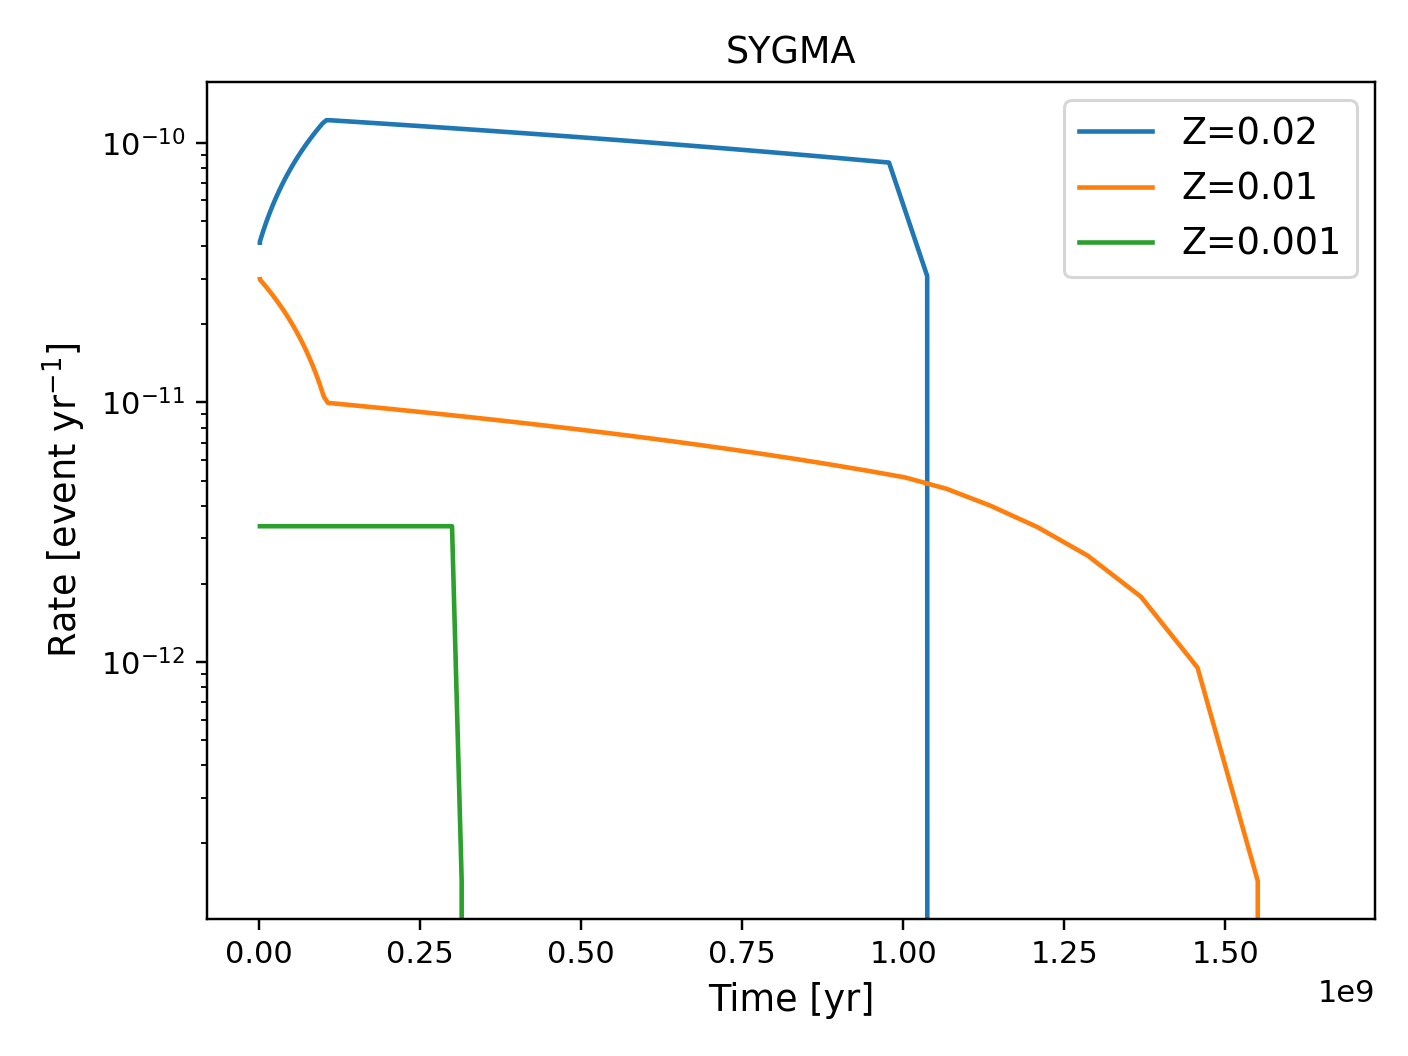

In [8]:
# Plot the rate for each metallicity
%matplotlib nbagg
for s in [s_0_02, s_0_01, s_0_001]:
    plt.plot(s.history.age[1:], np.array(s.delayed_extra_numbers[0])/s.history.timesteps, label="Z="+str(s.iniZ))
plt.yscale("log")
plt.xlabel('Time [yr]', fontsize=12)
plt.ylabel('Rate [event yr$^{-1}$]', fontsize=12)
plt.legend(fontsize=12)
plt.title("SYGMA", fontsize=12)
plt.tight_layout()

In [9]:
# Print predictions for Z = 0.02
print("Z = 0.02")
print("========")
i_Z = 0
W_180 = 1.00E-01
total_W_180_0_02 = W_180 * delayed_extra_dtd_norm[0][i_Z]
print("Yields of W-180 per event (see yields table):",W_180,"Msun")
print("Total number of events per stellar mass formed:", delayed_extra_dtd_norm[0][i_Z])
print("Total mass of W-180 for a", mgal, "Msun stellar popuplation:", total_W_180_0_02,"Msun")
print()

# Print predictions for Z = 0.01
print("Z = 0.01")
print("========")
i_Z = 1
W_180 = 1.00E-02
total_W_180_0_01 = W_180 * delayed_extra_dtd_norm[0][i_Z]
print("Yields of W-180 per event (see yields table):",W_180,"Msun")
print("Total number of events per stellar mass formed:", delayed_extra_dtd_norm[0][i_Z])
print("Total mass of W-180 for a", mgal, "Msun stellar popuplation:", total_W_180_0_01,"Msun")
print()

# Print predictions for Z = 0.001
print("Z = 0.001")
print("=========")
i_Z = 2
W_180 = 1.00E-03
total_W_180_0_001 = W_180 * delayed_extra_dtd_norm[0][i_Z]
print("Yields of W-180 per event (see yields table):",W_180,"Msun")
print("Total number of events per stellar mass formed:", delayed_extra_dtd_norm[0][i_Z])
print("Total mass of W-180 for a", mgal, "Msun stellar popuplation:", total_W_180_0_001,"Msun")
print()

Z = 0.02
Yields of W-180 per event (see yields table): 0.1 Msun
Total number of events per stellar mass formed: 0.1
Total mass of W-180 for a 1.0 Msun stellar popuplation: 0.010000000000000002 Msun

Z = 0.01
Yields of W-180 per event (see yields table): 0.01 Msun
Total number of events per stellar mass formed: 0.01
Total mass of W-180 for a 1.0 Msun stellar popuplation: 0.0001 Msun

Z = 0.001
Yields of W-180 per event (see yields table): 0.001 Msun
Total number of events per stellar mass formed: 0.001
Total mass of W-180 for a 1.0 Msun stellar popuplation: 1e-06 Msun



<IPython.core.display.Javascript object>


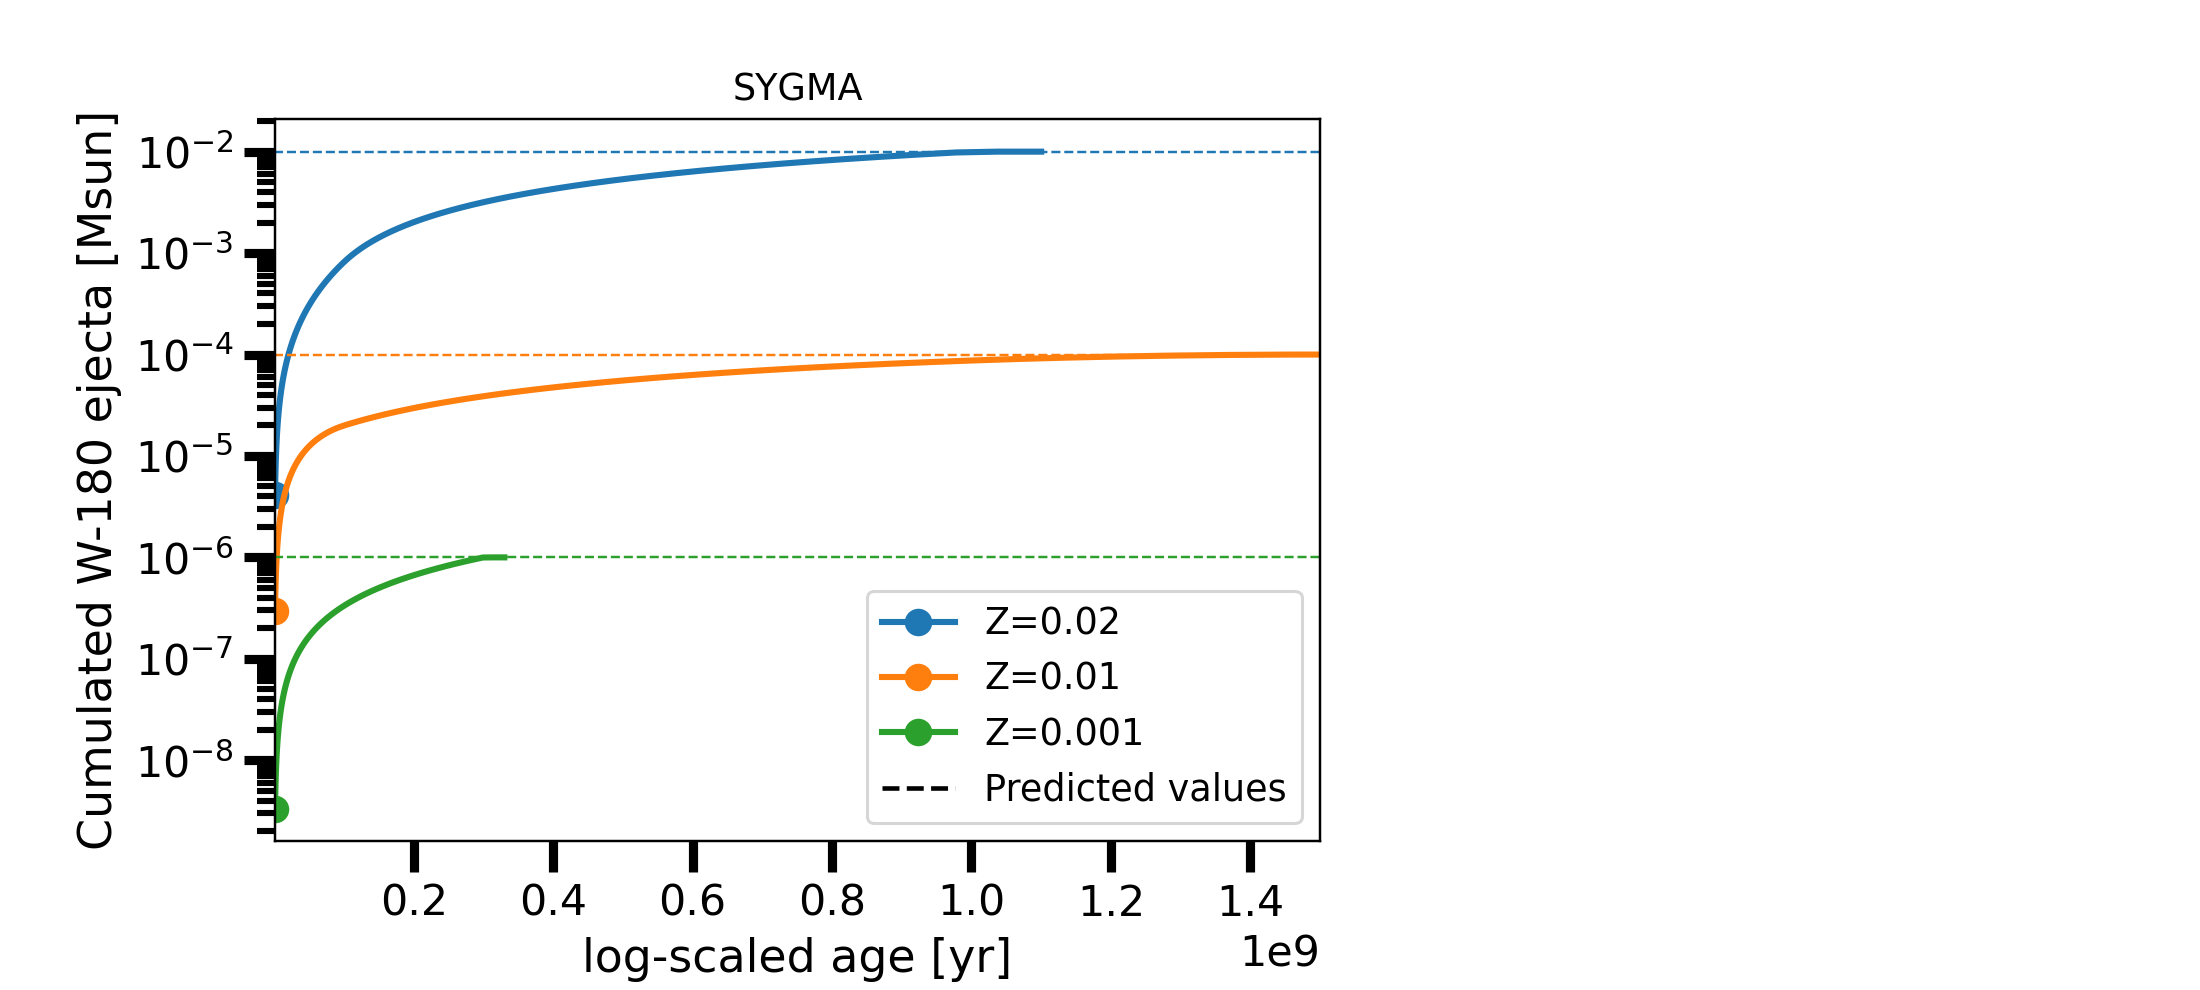

<ipython-input-11-9eb8bb0da7cf>:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,t_max)


In [11]:
# Plot mass ejected by the delayed-extra source in SYGMA
%matplotlib nbagg 
s_0_02.plot_mass( specie="W-180", markevery=10000, color="C0", label="Z=0.02")
s_0_01.plot_mass( specie="W-180", markevery=10000, color="C1", label="Z=0.01")
s_0_001.plot_mass(specie="W-180", markevery=10000, color="C2", label="Z=0.001")

# Plot predicted cumulated values
plt.plot([0,t_max], [total_W_180_0_02,total_W_180_0_02],   color="C0", ls="--", lw=0.8)
plt.plot([0,t_max], [total_W_180_0_01,total_W_180_0_01],   color="C1", ls="--", lw=0.8)
plt.plot([0,t_max], [total_W_180_0_001,total_W_180_0_001], color="C2", ls="--", lw=0.8)
plt.plot([], [], "--k", label="Predicted values")

# Set visual
plt.title("SYGMA", fontsize=12)
plt.xlim(0,t_max)
plt.xscale("linear")
plt.ylabel("Cumulated W-180 ejecta [Msun]")
plt.legend(fontsize=12)

## Test with the GCE OMEGA code

In [15]:
# Run OMEGA with the Z-dependent extra-delayed source
o = omega.omega(special_timesteps=120, mgal=1e10, **kwargs)

OMEGA run in progress..
   OMEGA run completed - Run time: 1.26s


<IPython.core.display.Javascript object>


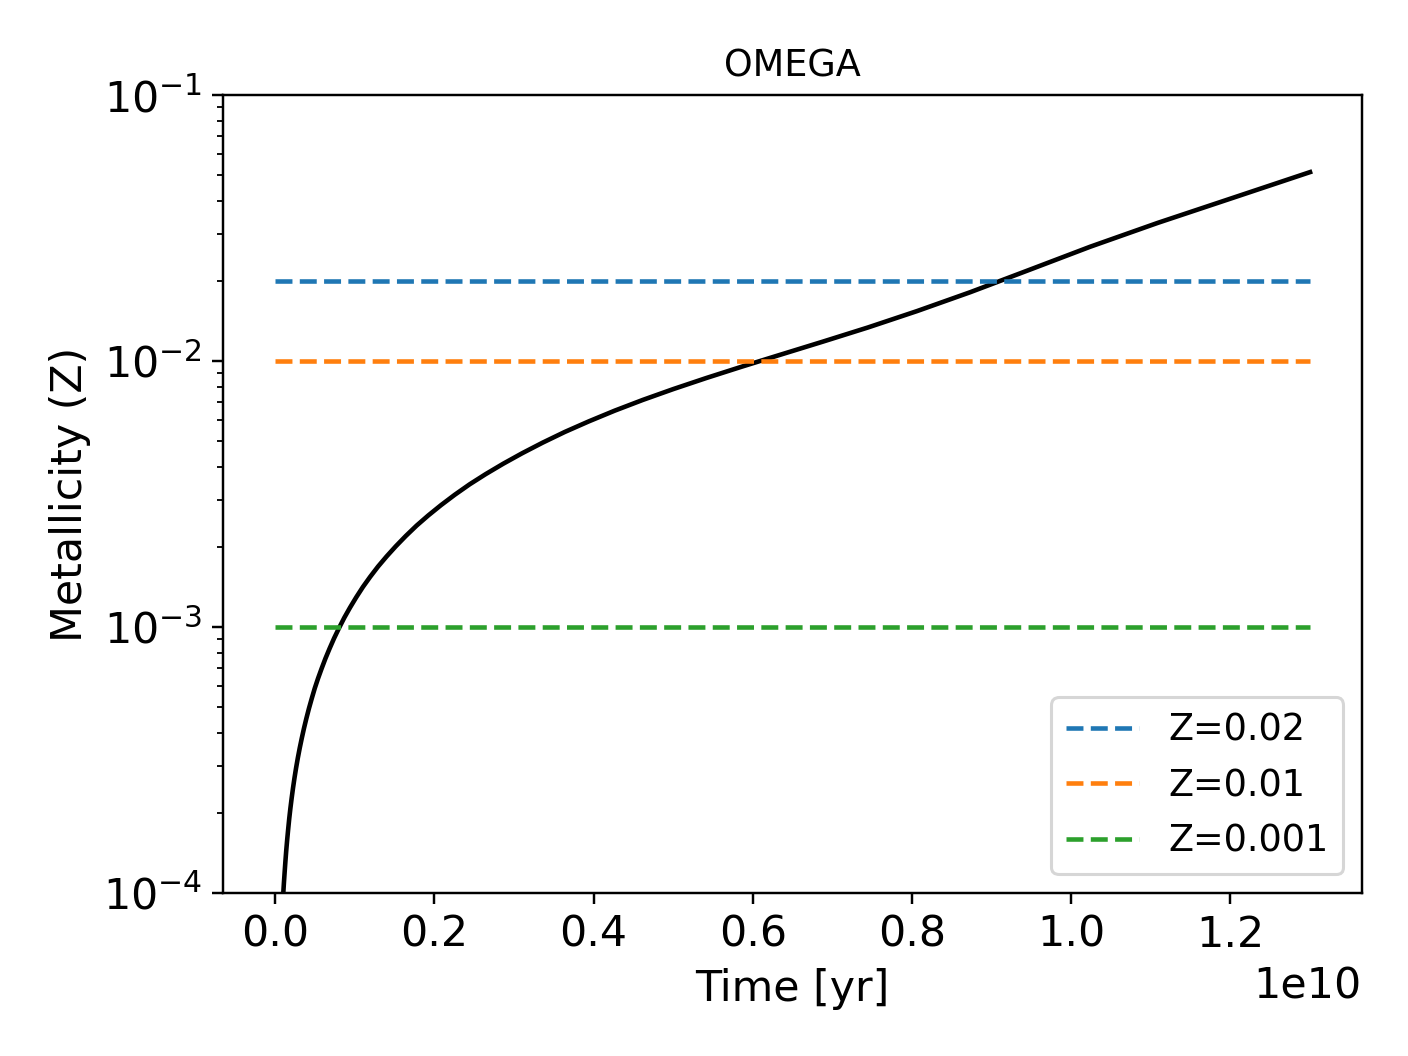

In [16]:
# Plot the evolution of metallicity
%matplotlib nbagg
plt.plot(o.history.age, o.history.metallicity, color="k")
plt.plot([0,13e9], [0.02,0.02],   ls="--", color="C0", label="Z=0.02")
plt.plot([0,13e9], [0.01,0.01],   ls="--", color="C1", label="Z=0.01")
plt.plot([0,13e9], [0.001,0.001], ls="--", color="C2", label="Z=0.001")

# Visual
plt.ylabel("Metallicity (Z)")
plt.xlabel("Time [yr]")
plt.yscale("log")
plt.title("OMEGA", fontsize=12)
plt.ylim(1e-4,1e-1)
plt.legend(fontsize=12)
plt.tight_layout()

<IPython.core.display.Javascript object>


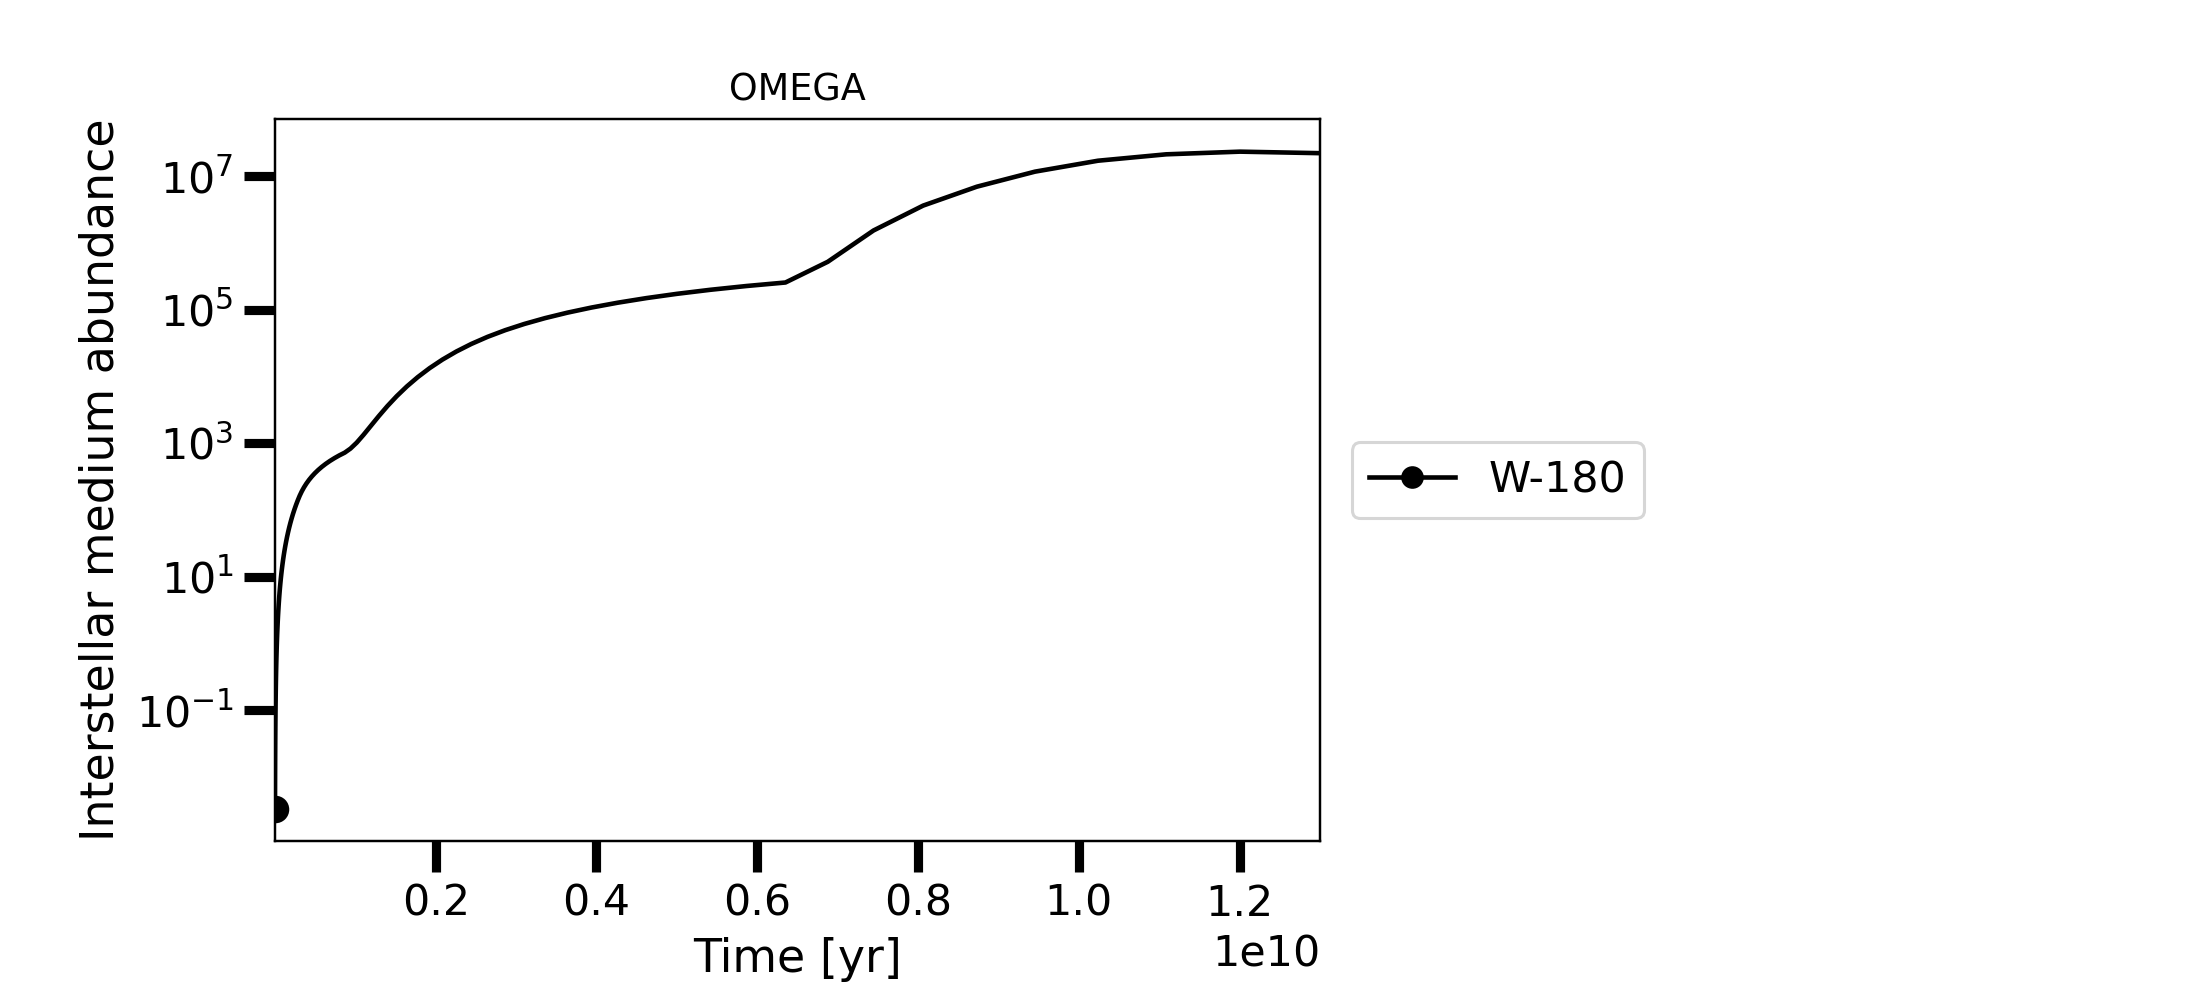

In [17]:
# Plot the evolution of W-180 in the interstellar medium
%matplotlib nbagg
o.plot_mass(specie="W-180", markevery=10000)
plt.xlabel("Time [yr]")
plt.ylabel("Interstellar medium abundance")
plt.title("OMEGA", fontsize=12)
plt.xscale("linear")